 <h1><center><b>The Winton Stock Market Challenge Kaggle competition</b></center></h1>

# **Content**:

 - - [Abstract](#abstract)
 - 1. [Introduction](#introduction)
   - 1.1 [Data Overview](#data_overview)
   - 1.2 [Evaluation](#evaluation)
   - 1.3 [Submission](#submission)
   - 1.4 [File Descriptions](#file_descriptions)
   - 1.5 [Data Fields](#data_fields)
 - 2. [Preparation](#preparation)
   - 2.1 [Imports](#imports)
   - 2.2 [Global Vars](#global_vars)
   - 2.3 [Data Loading](#data_loading)
 - 3. [Analysis](#analysis)
   - 3.1 [Analysis Constrains](#analysis_constrains)
   - 3.2 [Data Analysis](#data_analysis)
   - 3.3 [Visual Data Analysis](#visual_data_analysis)
 - 4. [Preprocessing](#preprocessing)
   - 4.1 [Feature Selection](#feature_selection)
   - 4.2 [Data Preprocessing](#data_preprocessing)
   - 4.3 [Visualize Data Preprocssesing](#visualize_data_preprocssesing)
 - 5. [Modelling](#modelling)
   - 5.1 [Model Building](#model_building)
   - 5.2 [Model Evaluation](#model_evaluation)
   - 5.3 [Save Model Output](#save_model_output)
 - 6. [Remarks](#remarks)
   - 6.1 [Improvements](#improvements)
   - 6.2 [Final Notes](#final_notes)

# **Abstract** <a class="anchor" id="abstract"></a>

 This is a solution for the [The Winton Stock Market Challenge Kaggle competition](https://www.kaggle.com/c/the-winton-stock-market-challenge).

 Since predicting stock market returns is notoriously hard, we will expect it to be difficult to beat
 a naive baseline model of just predicting mean returns of the training period. Also, since this is a
 *hiring competition* we will suspect the data set has been created in such a way, that dealing with
 important factors such as missing value imputation, numerical vs categorical features, colinearity,
 normalization, grouping and model robustness will be essential for competitors to demonstrate adequate
 skillsets in. Also, we note that we are here to win a Kaggle competition - not to make an actually viable
 trading algorithm.

 There where <font color=green>832</font> teams participating in the Kaggle competition. This solution has a Private Score of <font color=green>1727.86647</font> and
 a Public Score of <font color=green>1769.92199</font> and would have ranked as number <font color=green>4</font> (top <font color=green>0.5%</font>) on the Private Leaderboard.

# **1. Introduction** <a class="anchor" id="introduction"></a>

## **1.1 Data Overview** <a class="anchor" id="data_overview"></a>

 In this competition, the challenge is to predict the return of a stock, given the history of the past few days.

 We provide <font color=green>5-day windows of time</font>, days <font color=blue>D-2</font>, <font color=blue>D-1</font>,
 <font color=blue>D</font>, <font color=blue>D+1</font>, and <font color=blue>D+2</font>. You are given returns in days
 <font color=blue>D-2</font>, <font color=blue>D-1</font>, and
 part of day <font color=blue>D</font>, and you are asked to predict the returns in the rest of day <font color=red>D</font>, and in days
 <font color=red>D+1</font> and <font color=red>D+2</font>.

 During day <font color=red>D</font>, there is intraday return data, which are the returns at different points in
 the day. We provide
 180 minutes of data, from <font color=blue>t=1</font> to <font color=blue>t=180</font>. In the training set, you are given
 the full 180 minutes, in the test
 set just the first 120 minutes are provided.

 For each <font color=green>5-day window</font>, we also provide 25 features, <font color=blue>Feature_1</font>
 to <font color=blue>Feature_25</font>. These may or may not be useful
 in your prediction.

 Each row in the dataset is an arbitrary stock at an <font color=green>arbitrary 5 day time window</font>.

 How these returns are calculated is defined by Winton, and will not to be revealed to you in this competition.
 The data set is designed to be representative of real data and so should bring about a number of challenges.

 How these returns are calculated is defined by Winton, and will not to be revealed to you in this competition.
 The data set is designed to be representative of real data and so should bring about a number of challenges.

 <img src="https://storage.googleapis.com/kaggle-competitions/kaggle/4504/media/Presentation1%20(1).jpg" style="width: 700px;" />

## **1.2 Evaluation** <a class="anchor" id="evaluation"></a>

 Submissions are evaluated using the <font color=green>Weighted Mean Absolute Error</font>. Each return
 you predicted is compared with the actual return. The formula is then

 $$
 MAE = \frac{1}{n}\sum\limits_{i=1}^{n} w_i \cdot \left|y_i - \hat{y_i}\right|,
 $$

 where $w_i$ is the weight associated with the return, Weight_Intraday, Weight_Daily for intraday and daily returns,
 $i$, $y_i$ is the predicted return, $\hat{y_i}$ is the actual return, n is the number of predictions.

 The weights for the training set are given in the training data. The weights for the test set are unknown.

## **1.3 Submission** <a class="anchor" id="submission"></a>

 The submission file should contain two columns: <font color=yellow>Id</font> and <font color=red>Predicted</font>.
 For <font color=green>each 5-day window, you need to predict 62
 returns</font>. For example, for the first time window, you will predict <font color=red>1_1</font>, <font color=red>1_2</font>,
 to <font color=red>1_62</font>. <font color=red>1_1</font> to <font color=red>1_60</font> are predicting
 <font color=red>Ret_121</font> through <font color=red>Ret_180</font>, <font color=red>1_61</font> the prediction for
 <font color=red>Ret_PlusOne</font>, and <font color=red>1_62</font> the prediction for <font color=red>Ret_PlusTwo</font>.

 The file should contain a header and have the following format:

   <font color=yellow>Id</font>, <font color=red>Predicted</font>
   1_1,0
   1_2,0
   1_3,0
   1_4,0
   ...
   1_60,0
   1_61,0
   1_62,0
   2_1,0
   2_2,0
   etc.

## **1.4 File Descriptions** <a class="anchor" id="file_descriptions"></a>

 - train.csv - the training set, including the columns of:
   - <font color=blue>Feature_1</font> - <font color=blue>Feature_25</font>
   - <font color=blue>Ret_MinusTwo</font>, <font color=blue>Ret_MinusOne</font>
   - <font color=blue>Ret_2</font> - <font color=blue>Ret_120</font>
   - <font color=red>Ret_121</font> - <font color=red>Ret_180</font>: target variables
   - <font color=red>Ret_PlusOne</font>, <font color=red>Ret_PlusTwo</font>: target variables
   - Weight_Intraday, Weight_Daily

 - test.csv - the test set, including the columns of:
   - <font color=blue>Feature_1</font> - <font color=blue>Feature_25</font>
   - <font color=blue>Ret_MinusTwo</font>, <font color=blue>Ret_MinusOne</font>
   - <font color=blue>Ret_2</font> - <font color=blue>Ret_120</font>


 - sample_submission.csv - a sample submission file in the correct format

## **1.5 Data Fields** <a class="anchor" id="data_fields"></a>

 - <font color=blue>Feature_1</font> to <font color=blue>Feature_25</font>: different features relevant to prediction
 - <font color=blue>Ret_MinusTwo</font>: this is the return from the close of trading on day <font color=blue>D-2</font> to the close of trading
   on day <font color=blue>D-1</font> (i.e. 1 day)
 - <font color=blue>Ret_MinusOne</font>: this is the return from the close of trading on day <font color=blue>D-1</font> to the point at which the
   intraday returns start on day <font color=blue>D</font> (approximately 1/2 day)
 - <font color=blue>Ret_2</font> to <font color=blue>Ret_120</font>: these are returns over approximately one minute on day <font color=blue>D</font>.
   <font color=blue>Ret_2</font> is the return between <font color=blue>t=1</font> and <font color=blue>t=2</font>.
 - <font color=red>Ret_121</font> to <font color=red>Ret_180</font>: intraday returns over approximately one minute on day <font color=red>D</font>. These are the target
   variables you need to predict as <font color=red>{id}_{1-60}</font>.
 - <font color=red>Ret_PlusOne</font>: this is the return from the time <font color=red>Ret_180</font> is measured on day <font color=red>D</font> to the close of
   trading on day <font color=red>D+1</font>. (approximately 1 day). This is a target variable you need to predict as <font color=red>{id}_61</font>.
 - <font color=red>Ret_PlusTwo</font>: this is the return from the close of trading on day <font color=red>D+1</font> to the close of trading
   on day <font color=red>D+2</font> (i.e. 1 day) This is a target variable you need to predict as <font color=red>{id}_62</font>.
 - Weight_Intraday: weight used to evaluate intraday return predictions <font color=red>Ret 121</font> to <font color=red>180</font>
 - Weight_Daily: weight used to evaluate daily return predictions (<font color=red>Ret_PlusOne</font> and <font color=red>Ret_PlusTwo</font>).

# **2. Preparation** <a class="anchor" id="preparation"></a>

## **2.1 Imports** <a class="anchor" id="imports"></a>

In [1]:
from sklearn.base import BaseEstimator
from sklearn.svm import SVR
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion
from IPython import get_ipython
from IPython.display import display, HTML

from sklearn.base import TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR

import os
import random
import numpy as np
import pandas as pd
import pandas_profiling as pp
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from yellowbrick.features import Rank2D
from collections import defaultdict


## **2.2. Global Vars** <a class="anchor" id="global_vars"></a>

In [2]:
# ***** OBS!: Using too few rows will crash QuantileTransformer! *****
# Define debug mode
#DEBUG = True
DEBUG = False

# Define visualization mode
ANALYSE_DATA = True
#ANALYSE_DATA = False
SHOWPLOTS = True
#SHOWPLOTS = False
SHOWPLOTS_PROCCESED = True
#SHOWPLOTS_PROCCESED = False

# Define grid search mode
#GRIDSEARCH = False
GRIDSEARCH = True

# Define paths
ROOT_PATH = '/home/arni/Python/Sertis/the-winton-stock-market-challenge/'
DATA_PATH = ROOT_PATH + 'data/'
if not DEBUG:
    TRAIN_PATH = ROOT_PATH + 'data/train.csv'
    TEST_PATH = ROOT_PATH + 'data/test.csv'
else:
    TRAIN_PATH = ROOT_PATH + 'data/train_debug.csv'
    TEST_PATH = ROOT_PATH + 'data/test_debug.csv'
PROFILE_REPORT_PATH = DATA_PATH
RESULT_CSV_PATH = DATA_PATH + 'submission.csv'

# Define random seed
SEED = 1234


In [3]:
# Set random seed for reproducibility
random.seed(SEED)


## **2.3 Data Loading** <a class="anchor" id="data_loading"></a>

 Here we perform initial data processing. We will be using Pandas Dataframes throughout the solution.
 We will need to sort the data frame by <font color=blue>Feature_7</font> - the reason for this will become apparent in the
 [Data Analysis](#data_analysis) section. We will also aggregate the intraday return features <font color=blue>Ret_2</font>
 <font color=blue>Ret_121</font> as a new feature called <font color=blue>Ret_Agg</font>.

In [4]:
#
print("Loading data...")
train_df = pd.read_csv(TRAIN_PATH)
# We need to sort by 'Feature_7'. See Data Analysis section.
train_df.sort_values(by=['Feature_7'])
test_df = pd.read_csv(TEST_PATH)

# Aggregate intraday returns
intraday_rets = []
rets = ['Ret_MinusTwo', 'Ret_MinusOne']
train_aggregated_rets = pd.DataFrame(columns=['Ret_Agg', 'Ret_Agg_Std', 'Ret_Std', ])
test_aggregated_rets = pd.DataFrame(columns=['Ret_Agg', 'Ret_Agg_Std', 'Ret_Std'])

for i in range(2, 121):
    intraday_rets.append(f'Ret_{i}')

train_aggregated_rets['Ret_Agg'] = train_df[intraday_rets].sum(axis=1)
train_aggregated_rets['Ret_Agg_Std'] = train_df[intraday_rets].std(axis=1)
train_aggregated_rets['Ret_Std'] = train_df[rets].std(axis=1)
train_df = pd.concat([train_df, train_aggregated_rets], axis=1)

test_aggregated_rets['Ret_Agg'] = test_df[intraday_rets].sum(axis=1)
test_aggregated_rets['Ret_Agg_Std'] = test_df[intraday_rets].std(axis=1)
test_aggregated_rets['Ret_Std'] = test_df[rets].std(axis=1)
test_df = pd.concat([test_df, test_aggregated_rets], axis=1)

# Prepare train, validation and test data
features = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6',
            'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12',
            'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18',
            'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24',
            'Feature_25', 'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_Agg', 'Ret_Agg_Std', 'Ret_Std', ]
targets = ['Ret_PlusOne', 'Ret_PlusTwo']
weights_intraday = 'Weight_Intraday'
weights_daily = 'Weight_Daily'
weights = [weights_intraday, weights_daily]
features_targets = features + targets

train_X_Y_df = train_df[features + targets]
train_X_df = train_df[features]
train_Y_df = train_df[targets]
train_weights_daily_df = train_df[weights_daily]
test_X_df = test_df[features]

print('Data loaded')
print(f'Shape of training feature data: {train_X_df.shape}')
print(f'Shape of training target data: {train_Y_df.shape}')
print(f'Shape of test feature data: {test_X_df.shape}')



Loading data...
Data loaded
Shape of training feature data: (40000, 30)
Shape of training target data: (40000, 2)
Shape of test feature data: (120000, 30)


# **3. Analysis** <a class="anchor" id="analysis"></a>

## **3.1 Analysis Constrains** <a class="anchor" id="analysis_constrains"></a>

 In the interest of time we will focus only on predicting <font color=red>Ret_PlusOne</font> and <font color=red>Ret_PlusTwo.</font> To further justify this, we also note
 that intraday one min data is **_likely_** to be too noisy to be predictied by the data given in this competition. Hence we will only
 output predictions for <font color=red>{id}_61</font> and <font color=red>{id}_62</font> and output 0 for all of <font color=red>{id}_{1-60}</font>.

## **3.2 Data Analysis** <a class="anchor" id="data_analysis"></a>

 Here we will do initial data analysis. For each feature in the data set we look at the number of
 missing values, how many values are unique, how imbalanced the values are, how many potential
 outliers are contained in the values and if values in the training and test sets are disjoint.

 We define potential outliers as values which differs from the mean by more than 3 standard deviations.

In [5]:
def outliers(col):
    std3 = col.std() * 3
    mean = col.mean()
    c = 0
    for row in col:
        if (abs(row - mean) > std3):
            c = c + 1
    return c

def analyse_df(name, df_train, df_test=None, percentage=True):
    test_set = ()
    vals = []
    vals_percent = []
    for col in df_train:
        if df_test is not None:
            test_set = set(df_test[col])
        switcher = {
            'Missing': sum(df_train[col].isnull()),
            'Unique': len(df_train[col].unique()),
            'Imbalance': df_train[col].value_counts().values[0],
            'Outlier': outliers(df_train[col]),
            'Disjoint': set(df_train[col]).isdisjoint(test_set)
        }
        val = switcher.get(name)
        vals.append(val)
        vals_percent.append(val/len(df_train[col])*100)
    if percentage:
        res_df = pd.DataFrame(list(zip(vals, vals_percent)), columns=[name, f'{name} %'])
    else:
        res_df = pd.DataFrame(list(zip(vals)), columns=[name])
    return res_df


if ANALYSE_DATA:
    # OBS: This is very compute intensive
    print('Analysing data (this will take a while)...')
    missing_data = analyse_df('Missing', train_X_Y_df)
    unique_data = analyse_df('Unique', train_X_Y_df)
    balanced_data = analyse_df('Imbalance', train_X_Y_df)
    outlier_data = analyse_df('Outlier', train_X_Y_df)
    disjoint_data = analyse_df('Disjoint', train_X_df, test_X_df, False)
    analyse_data = pd.concat([pd.DataFrame(train_X_Y_df.columns), missing_data, unique_data,
                              balanced_data, outlier_data, disjoint_data], axis=1)
    print("Data Analysis:")
    print(analyse_data)


Analysing data (this will take a while)...
Data Analysis:
               0  Missing  Missing %  Unique  Unique %  Imbalance  \
0      Feature_1    33313    83.2825      11    0.0275       2651   
1      Feature_2     9146    22.8650   30855   77.1375          1   
2      Feature_3     1237     3.0925   38764   96.9100          1   
3      Feature_4     7721    19.3025   32280   80.7000          1   
4      Feature_5        0     0.0000      10    0.0250       6943   
5      Feature_6     1933     4.8325   38068   95.1700          1   
6      Feature_7        0     0.0000     824    2.0600        114   
7      Feature_8      469     1.1725      33    0.0825       4178   
8      Feature_9     1875     4.6875      37    0.0925       5863   
9     Feature_10    19471    48.6775       7    0.0175      14437   
10    Feature_11      987     2.4675   39014   97.5350          1   
11    Feature_12     1096     2.7400     102    0.2550       1596   
12    Feature_13      594     1.4850      11 

 From this analysis we observe the following:

 - <font color=blue>Feature_1</font> has a very high number of missing values. It is likely that dropping this feature will improve model performance.

 - <font color=blue>Feature_1</font>, <font color=blue>Feature_5</font>, <font color=blue>Feature_7</font>, <font color=blue>Feature_8</font>, <font color=blue>Feature_9</font>, <font color=blue>Feature_12</font>, <font color=blue>Feature_13</font>, <font color=blue>Feature_16</font> and <font color=blue>Feature_20</font> contains few
   uniqe values. These features are therefore determined to be categorical.

 - <font color=blue>Feature_15</font> is highly imbalanced.

 - Besides being categorical, <font color=blue>Feature_6</font> and <font color=blue>Feature_7</font> are also distinct between the training and the test data sets.
   However, <font color=blue>Feature_6</font> is highly unique, whereas <font color=blue>Feature_7</font> only contains relatively few unique values.

 This leaves <font color=blue>Feature_7</font> as a special feature. We will try investigate this feature more thoroughly, by grouping returns by values of <font color=blue>Feature_7</font> and
 look for a relationship in the sign of the returns to see if equal values of <font color=blue>Feature_7</font> has correlated returns.

In [6]:
if ANALYSE_DATA:
    feature_groups = defaultdict(list)
    for i, row in train_df.iterrows():
        val = row['Ret_PlusOne']
        if val > 0:
            feature_groups[row['Feature_7']].append(1)
        else:
            feature_groups[row['Feature_7']].append(-1)

    freq = 0
    for key, val in feature_groups.items():
        frq0 = val.count(1)/len(val)
        frq1 = len(val) - frq0
        frq = max(frq0, frq1)
        freq += frq/len(val)
    freq = freq / len(feature_groups)

    print(f'Frequence of return signs: {freq}')


Frequence of return signs: 0.9886483932059086


 We observe that the sign of the returns within each group is almost 100% correlated. Regardless of what the nature of <font color=blue>Feature_7</font> is,
 we have to account for this relationship when doing model cross-validation to avoid data leakage. Most likely, <font color=blue>Feature_7</font>
 has a relationship to time, which would explain why returns within the groups are correlated.

## **3.3 Visual Data Analysis** <a class="anchor" id="visual_data_analysis"></a>

 We will try to get a better understanding of the properties of the different features by plotting
 the features mutual correlations, the distributions of the features and regression plots for the features
 to see how they relate to the targets (for ease we are only looking at <font color=red>Ret_PluOne</font>
 in the regression plots). To make data plotting faster, we will only look at a sample of 10% of the data.

In [7]:
def plot(train_df: pd.DataFrame, test_df: pd.DataFrame, features: list,
         transformer: Pipeline = None, frac: float = 0.1, label: str = ''):

    train_data = train_df.sample(frac=frac, random_state=0)
    test_data = test_df.sample(frac=frac, random_state=0)

    if transformer is not None:
        train_data = transformer.fit_transform(train_data[features])
        train_data_df = pd.DataFrame(train_data, columns=features)
        test_data = transformer.transform(test_data[features])
        test_data_df = pd.DataFrame(test_data, columns=features)
    else:
        imputer = SimpleImputer(strategy='constant')
        train_data_df = pd.DataFrame(imputer.fit_transform(
            train_df[features]), columns=features)
        test_data_df = pd.DataFrame(imputer.fit_transform(
            test_df[features]), columns=features)

    print(label)
    fig, ax = plt.subplots(round(len(features) / 3), 3, figsize=(15, 15))
    for i, ax in enumerate(fig.axes):
        if i < len(features):
            sns.distplot(train_data_df[features[i]], color='blue', ax=ax)
            sns.distplot(test_data_df[features[i]], color='red', ax=ax)


if SHOWPLOTS:
    data_plot = train_X_Y_df.sample(frac=0.1, random_state=0)
    imputer = SimpleImputer(strategy='constant')
    data_plot_no_nan = pd.DataFrame(imputer.fit_transform(data_plot), columns=features_targets)
    num_features = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_6',
                    'Feature_11', 'Feature_14', 'Feature_15',
                    'Feature_17', 'Feature_18', 'Feature_19',
                    'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25',
                    'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_Agg']
    cat_features = ['Feature_5', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
                    'Feature_12', 'Feature_13', 'Feature_16', 'Feature_20']

#     g = sns.PairGrid(data_plot_no_nan, vars=num_features)
#     g.map_diag(sns.kdeplot)
#     g.map_lower(sns.kdeplot)
#     g.map_upper(plt.scatter)


Correlation heatmap:


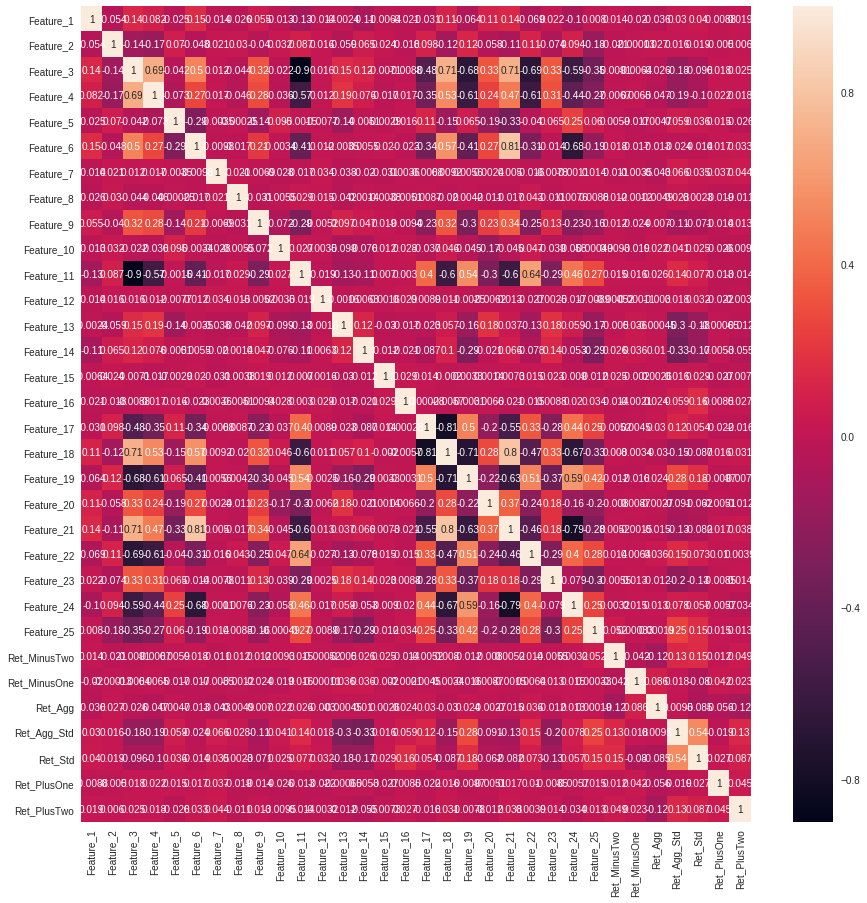

In [8]:
if SHOWPLOTS:
    # Correlation heatmap for all features and targets
    print("Correlation heatmap:")
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(data_plot_no_nan.corr(), annot=True, ax=ax)


Correlation heatmap for numerical features:


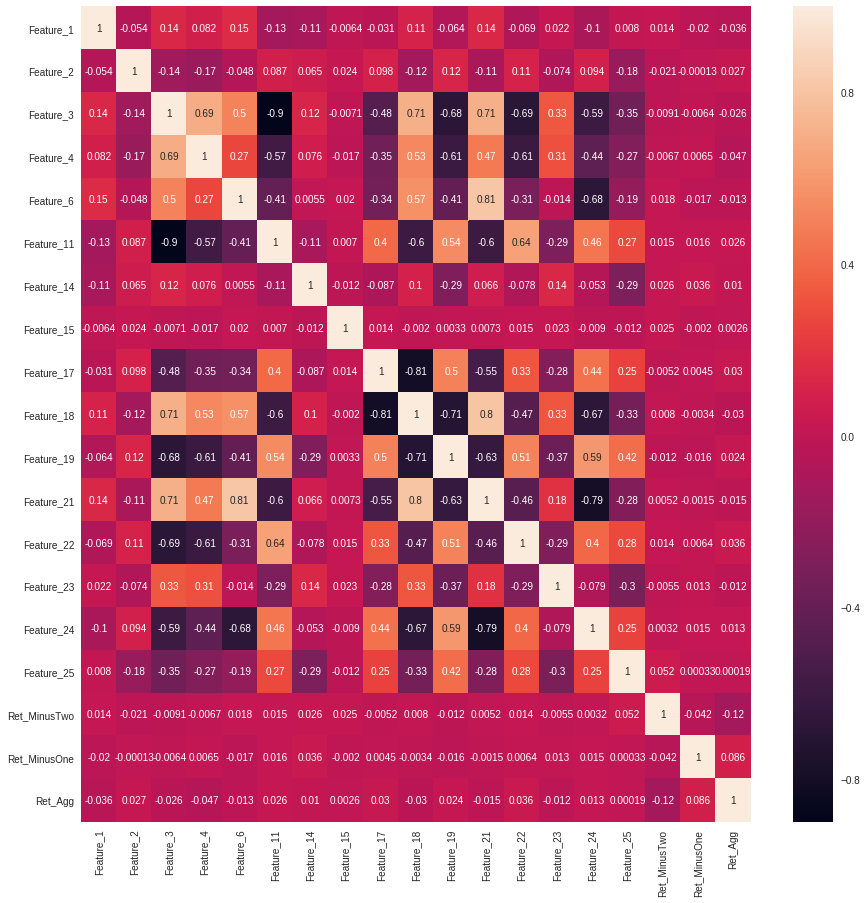

In [9]:
if SHOWPLOTS:
    # Correlation heatmap for numerical features
    print("Correlation heatmap for numerical features:")
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(data_plot_no_nan[num_features].corr(), annot=True, ax=ax)


Correlation heatmap for categorical features:


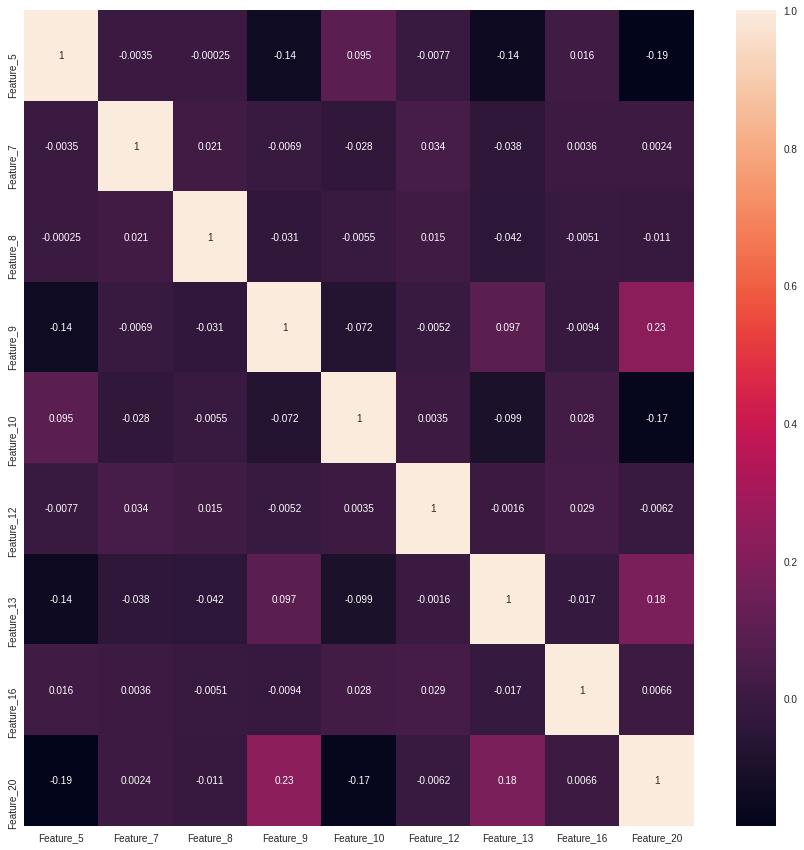

In [10]:
if SHOWPLOTS:
    # Correlation heatmap for categorical features
    print("Correlation heatmap for categorical features:")
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(data_plot_no_nan[cat_features].corr(), annot=True, ax=ax)


Raw distributiions: Features


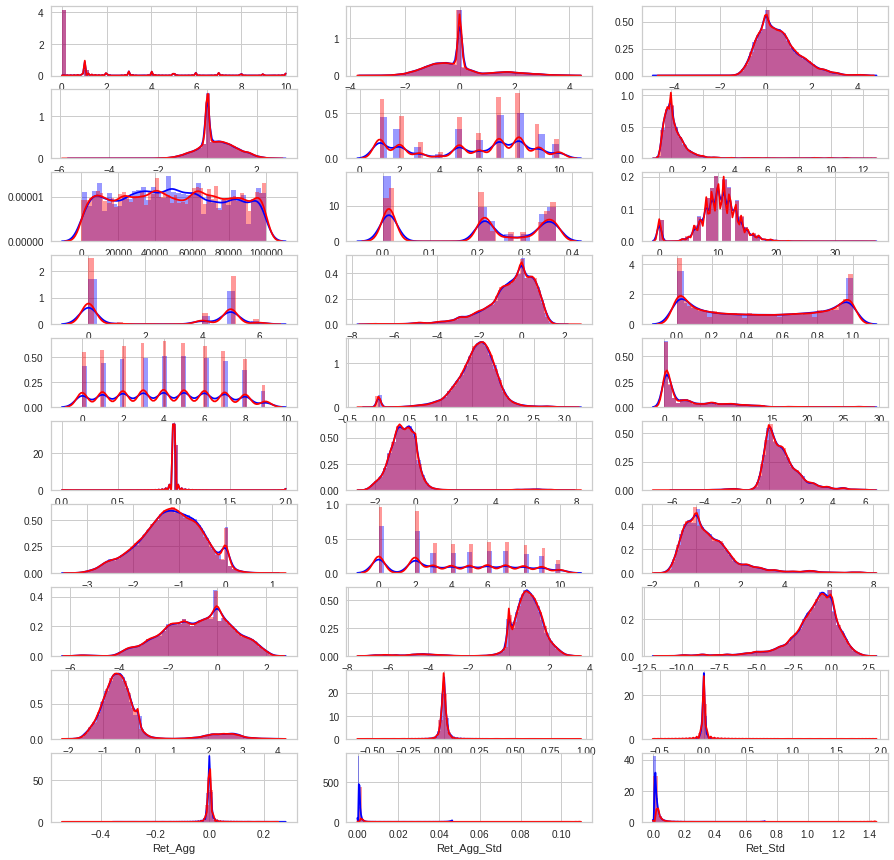

In [11]:
if SHOWPLOTS:
    # Distributions
    plot(train_X_df, test_X_df, features=features, label='Raw distributiions: Features')


Regression plots:


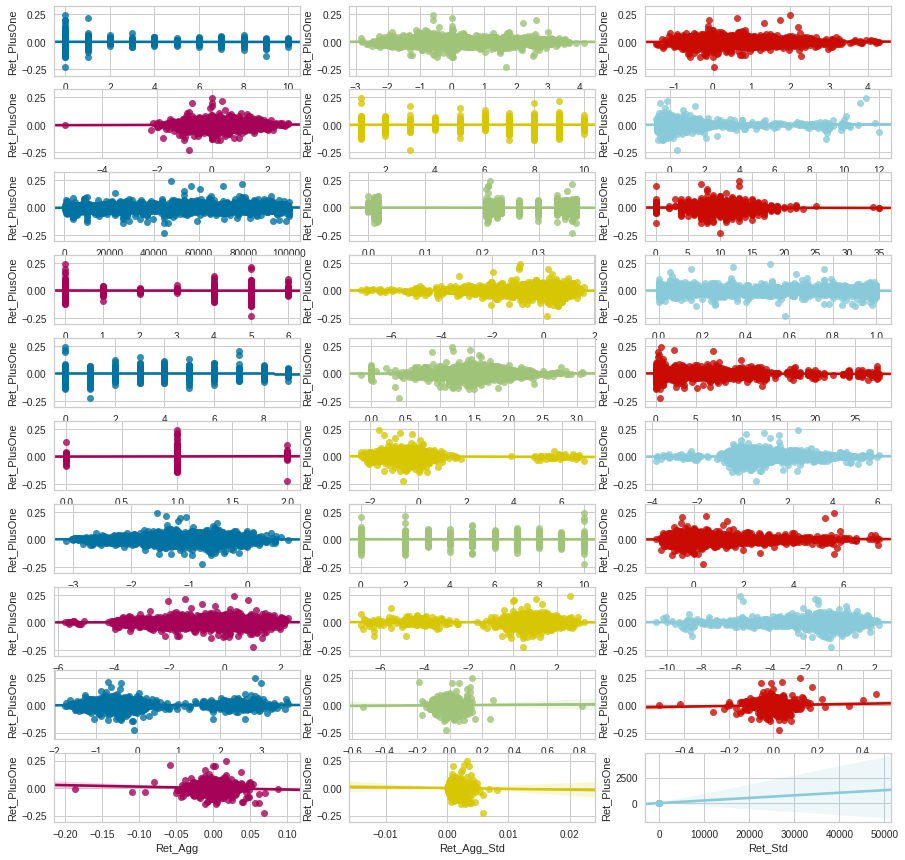

In [12]:
if SHOWPLOTS:
    # Regression plots
    print("Regression plots:")
    fig, ax = plt.subplots(round(len(features) / 3), 3, figsize=(15, 15))
    for i, ax in enumerate(fig.axes):
        if i < len(features):
            sns.regplot(x=features[i], y=targets[0], data=data_plot_no_nan, ax=ax)


 We observe first that - as expected when trying to predict stock returns - each feature shows very litle
 correlation with targets (apparent from both the correlation heatmap and the regression plots). Ve also observe
 a high correlation between some of the numerical features - in fact there seems to be 3 distinct clusters of correlation:

 - [<font color=blue>Feature_3</font> - <font color=blue>Feature_11</font>] correlates with [<font color=blue>Feature_3</font> - <font color=blue>Feature_11</font>]
 - [<font color=blue>Feature_3</font> - <font color=blue>Feature_11</font>] correlates with [<font color=blue>Feature_17</font> - <font color=blue>Feature_25</font>]
 - [<font color=blue>Feature_17</font> - <font color=blue>Feature_25</font>] correlates with [<font color=blue>Feature_17</font> - <font color=blue>Feature_25</font>]

 within the numerical features. This is probably not coincidental, and it is likely that an optimal solution needs to take advantage of these relationships.
 In this solution, however, we will not investigate it further. We also observer that most of the feature distributions does not
 appear to be gaussian. We will deal with these issues in the [Data Preprocessing](#data_preprocessing) section.

 Finally, we observe that <font color=blue>Feature_13</font> has a relatively "smooth" distribution. We suspect that this feature
 might contain ordered information.

# **4. Preprocessing** <a class="anchor" id="preprocessing"></a>

## **4.1 Feature Selection** <a class="anchor" id="feature_selection"></a>

 We will be using a robust preprocessing and modelling approach - hence, we include all features. Based on the above analysis, we split the features into
 numerical and categorical. We further split categorical into ordered (<font color=blue>Feature_13</font>) and unordered.

In [13]:
# Define final features
num_features_final = ['Feature_2', 'Feature_3', 'Feature_4', 'Feature_6',
                      'Feature_11', 'Feature_14',
                      'Feature_17', 'Feature_18', 'Feature_19',
                      'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25',
                      'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_Agg', 'Ret_Agg_Std',
                      'Ret_Std']

cat_features_ordinal_final = ['Feature_13']

cat_features_nominal_final = ['Feature_1', 'Feature_5', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
                              'Feature_12', 'Feature_15', 'Feature_16', 'Feature_20']

cat_features_final = cat_features_ordinal_final + cat_features_nominal_final
features_final = num_features_final + cat_features_final

train_X_df = train_df[features_final]
test_X_df = test_df[features_final]


## **4.2 Data Preprocessing** <a class="anchor" id="data_preprocessing"></a>

 Here we define the piplines for preprocessing the input features and targets.

 We will impute both numerical and categorical features using a constant. This is chosen as the most conservative option.

 For numerical features, we will scale them using quantile range = [5, 95] as this approach is robust to outliers. Then we
 try to forces the distribution to be gaussian by using a quantile transformation. This is justified by the tendency of
 linear estimators to perform better on gaussian distributions. We also cut off values which lies
 more than 3 standard deviations from the centre to improve our handling of outliers.

 For ordered categorical features, we encode them using OrdinalEncoder to preserve the ordering.

 For unordered categorical features, we remove correlations between features by using PCA whitening and then one-hot encode so we can
 use models in the model building step that does not deal natively with categorical features.

 Finally, we normalize all features using l2-norm. The last step seems to improve l2-regulized regression significantly.

 *NOTE: We would have expected that PCA whitening of the numerical features would be beneficial for model performance since
 many of the numerical features are highly correlated. However, the opposite seems to be true. Perhaps the correlation clusters
 apparent in the correlation heatmap contains interesting information. We will leave it to a future improvement to try to
 investigate this further.*

 For target returns, we also use a quantile transformation to force the distribution of returns (which are not normally gaussian)
 into a gaussian distribution. We could also have used log transformation, but quantile transformation yields a better
 model performance.

In [14]:
class CutOff(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        X[X > 3] = 3
        X[X < -3] = -3
        return X

# Preprocessing for numerical data
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('scale', RobustScaler(quantile_range=[5, 95])),
    ('quantile', QuantileTransformer(n_quantiles=300, output_distribution='normal', random_state=0)),
    ('cutoff', CutOff()),  # Cut off at 3 standard deviations
    ('norm', Normalizer(norm='l2'))
])

# Preprocessing for nominal categorical data
cat_transformer_nominal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('pca', PCA(whiten=True, random_state=0)),
    ('bins', KBinsDiscretizer(n_bins=100, encode='onehot', strategy='quantile')),
    ('norm', Normalizer(norm='l2')),
])

# Preprocessing for ordinal categorical data
cat_transformer_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('bins', KBinsDiscretizer(n_bins=100, encode='ordinal', strategy='quantile')),
    ('norm', Normalizer(norm='l2')),
])

# Combined preprocessing for numerical and categorical data
preprocessor_X = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features_final),        
        ('cat_nom', cat_transformer_nominal, cat_features_nominal_final),
        ('cat_ord', cat_transformer_ordinal, cat_features_ordinal_final)        
    ])

# Testing preprocessor
preprocessor_X_shape = preprocessor_X.fit_transform(train_X_df).shape
print(f'preprocessor_X output shape: {preprocessor_X_shape}')

# Target transformer
preprocessor_Y = Pipeline(steps=[
    ('quantile', QuantileTransformer(n_quantiles=300, output_distribution='normal', random_state=0))
])


preprocessor_X output shape: (40000, 1020)


/home/arni/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.



## **4.3 Visualize Data Preprocessing** <a class="anchor" id="visualize_data_preprocssesing"></a>

 Here we look at the effects of preprocessing the features. Again, to make data plotting
 faster, we will only look at a sample of 10% of the data.

 We will try to get an idea about how the transformation affects the categorical values by reducing
 the dimension of the output using PCA (we use TruncatedSVD, which is suitable for sparse input).

In [15]:
if (SHOWPLOTS_PROCCESED):
    # Transform numerical features and targets
    data_plot = train_X_Y_df.sample(frac=0.1, random_state=0)
    imputer = SimpleImputer(strategy='constant')
    data_plot_no_nan = pd.DataFrame(
        imputer.fit_transform(data_plot), columns=features_targets)

    num_transformed = num_transformer.fit_transform(
        data_plot_no_nan[num_features_final])
    viz_train_X_num_df = pd.DataFrame(
        num_transformed, columns=num_features_final)
    viz_train_Y_df = pd.DataFrame(
        preprocessor_Y.fit_transform(train_Y_df), columns=targets)
    viz_train_X_Y_num_df = pd.concat(
        [viz_train_X_num_df, viz_train_Y_df], axis=1)

    cat_transformed = cat_transformer_nominal.fit_transform(
        num_transformer.fit_transform(data_plot_no_nan[cat_features_final]))
    dim = 20
    cat_features_pca = []
    for i in range(0, dim):
        cat_features_pca.append(f'{i}')
    cat_transformed_pca = TruncatedSVD(
        n_components=dim).fit_transform(cat_transformed)
    viz_train_X_cat_df = pd.DataFrame(
        cat_transformed_pca, columns=cat_features_pca)
    viz_train_X_Y_cat_df = pd.concat(
        [viz_train_X_cat_df, viz_train_Y_df], axis=1)


After preproccssing numerical features: Distributions:


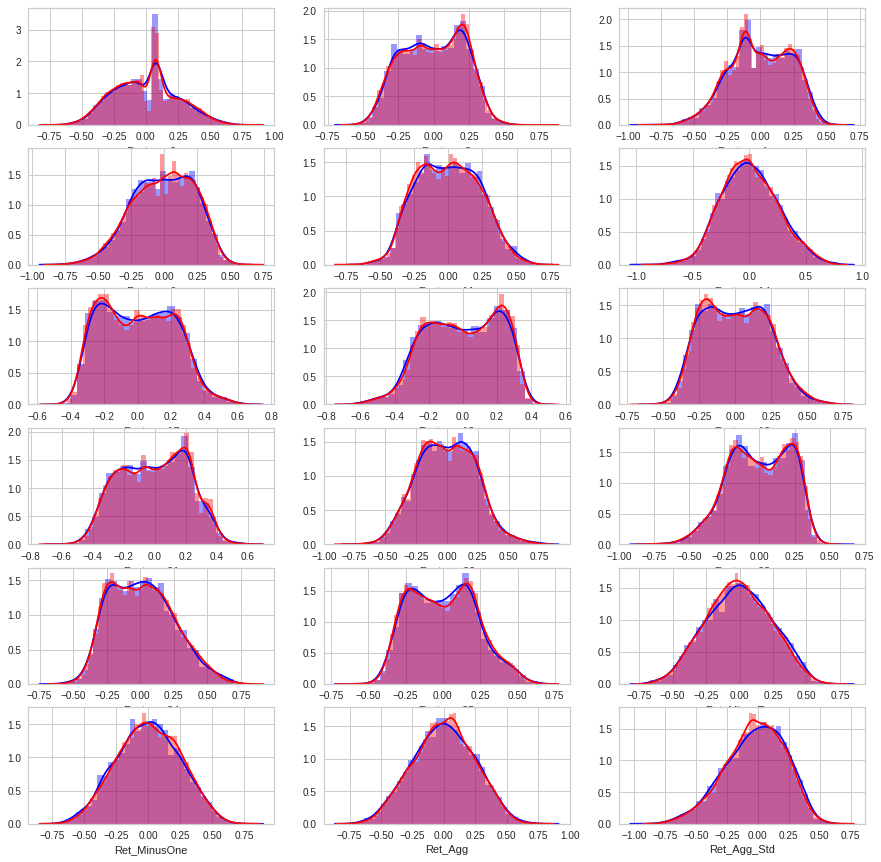

In [16]:
if (SHOWPLOTS_PROCCESED):
    # Distributions of numerical features after preprocssesing
    plot(train_X_df, test_X_df, features=num_features_final, transformer=num_transformer,
         label='After preproccssing numerical features: Distributions:')


After preproccssing numerical features: Regression plots:


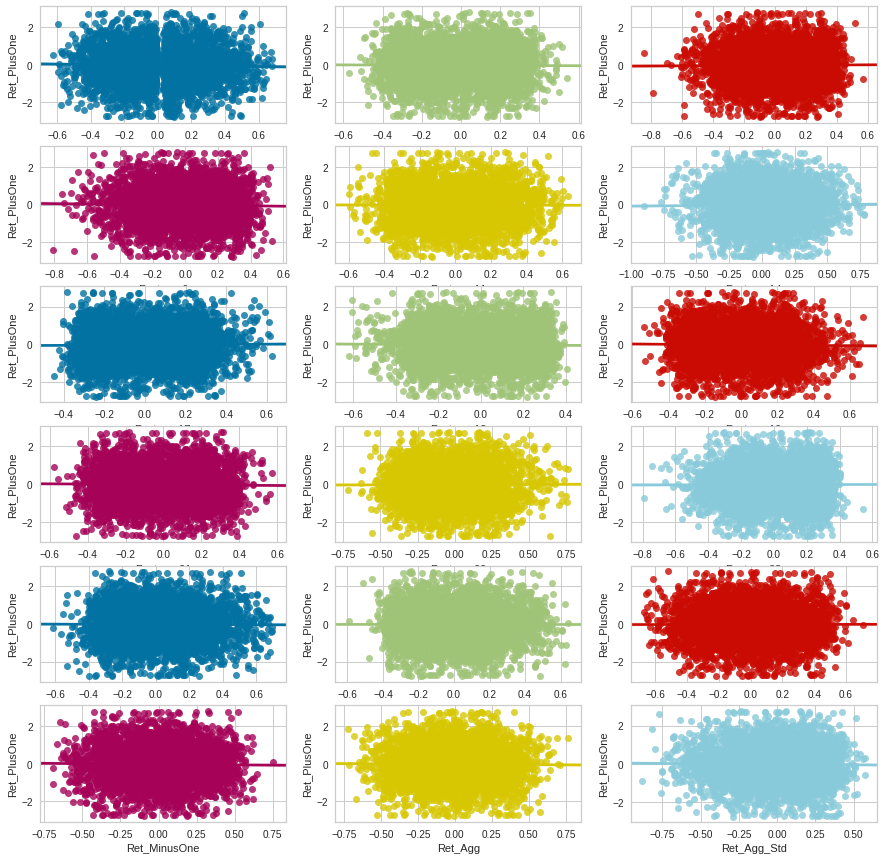

In [17]:
if (SHOWPLOTS_PROCCESED):
    # Regression plots of numerical features after preprocssesing
    print("After preproccssing numerical features: Regression plots:")
    fig, ax = plt.subplots(
        round(len(num_features_final) / 3), 3, figsize=(15, 15))
    for i, ax in enumerate(fig.axes):
        if i < len(num_features_final):
            sns.regplot(
                x=num_features_final[i], y=targets[0], data=viz_train_X_Y_num_df, ax=ax)


After preproccssing categorical features: Distributions:


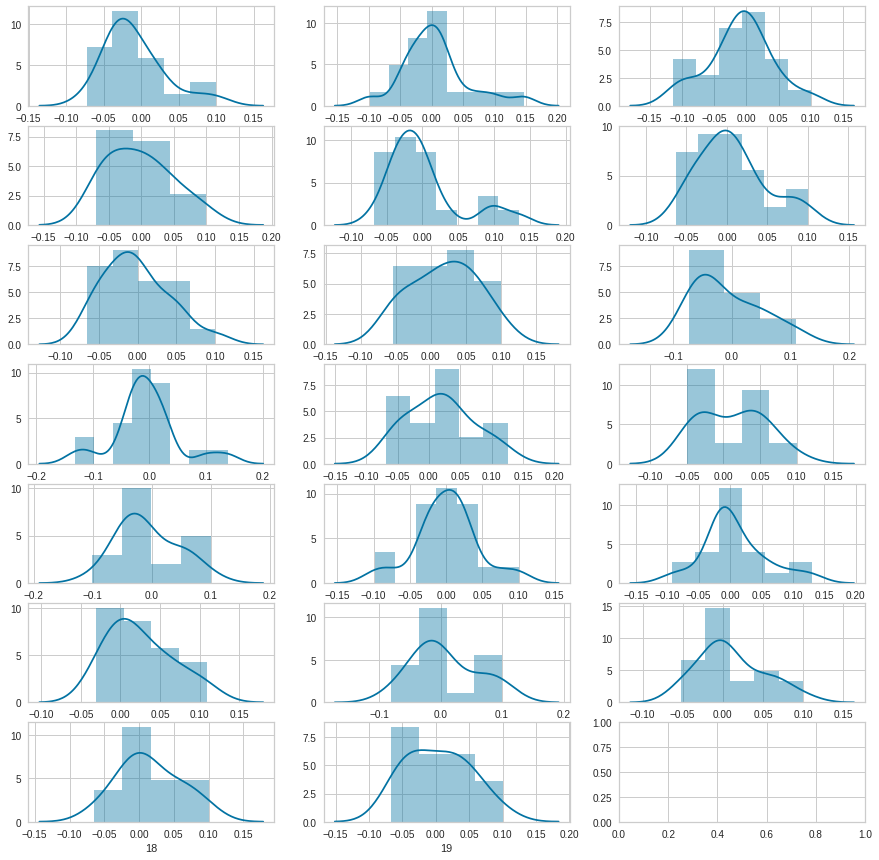

In [18]:
# if (SHOWPLOTS):
    # Distributions of categorical features after preprocssesing
    #plot(train_X_df, test_X_df, features=cat_features_final, transformer=cat_transformer, label='Preproccesed distributiions')

if (SHOWPLOTS_PROCCESED):
    # Distributions of categorical features after preprocssesing
    print("After preproccssing categorical features: Distributions:")
    fig, ax = plt.subplots(round(dim / 3), 3, figsize=(15, 15))
    for i, ax in enumerate(fig.axes):
        if i < dim:
            #sns.distplot(viz_train_X_num_df.iloc[i], ax=ax)
            sns.distplot(viz_train_X_cat_df.iloc[i], ax=ax)


After preproccssing categorical features: Regression plots:


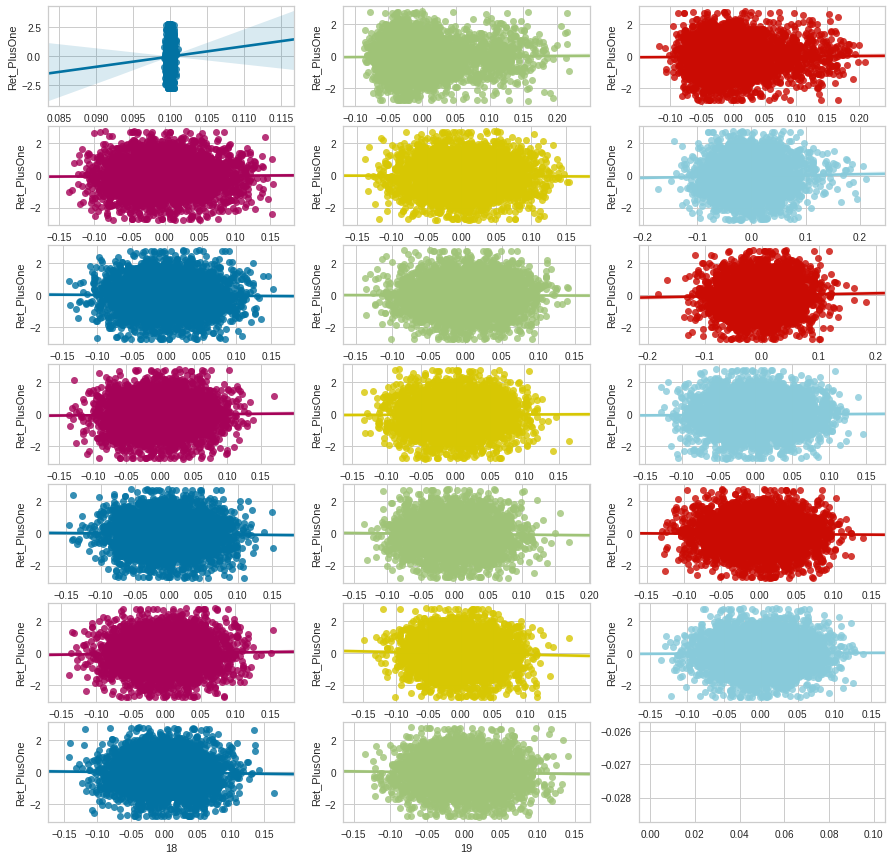

In [19]:
if (SHOWPLOTS_PROCCESED):
    # Regression plots categorical features after preprocssesing
    print("After preproccssing categorical features: Regression plots:")
    fig, ax = plt.subplots(round(dim / 3), 3, figsize=(15, 15))
    for i, ax in enumerate(fig.axes):
        if i < dim:            
            sns.regplot(x=cat_features_pca[i], y=targets[0], data=viz_train_X_Y_cat_df, ax=ax)


After preproccssing targets: Distributions:


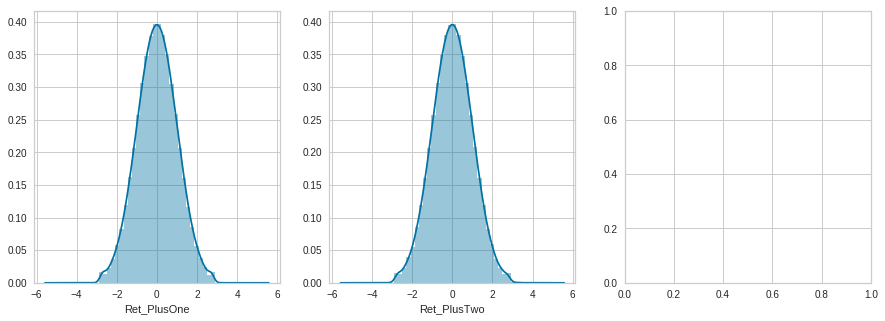

In [20]:
if (SHOWPLOTS_PROCCESED):
    # Distributions of targets after preprocssesing
    print("After preproccssing targets: Distributions:")
    fig, ax = plt.subplots(round(len(targets) / 3), 3, figsize=(15, 5))
    for i, ax in enumerate(fig.axes):
        if i < len(targets):
            sns.distplot(viz_train_Y_df[targets[i]], ax=ax)


 We see that most distributions of the numerical features as well as the targets now appear "smooth" and more "gaussian-like". But we also observe
 that some features still have a some degree of imbalance. We will not deal with this issue further, but note that
 we could remove the problematic rows at the risk of loosing other valueable data points.

 It is not really easy to interpret the transposed output of the preprocessed categorical features. We will just note that nothing sticks out as odd.

 Finally, we observe that after the preprocessed step, the individual features still shows very little sign of any relationship with the targets.

# **5. Modelling** <a class="anchor" id="modelling"></a>

## **5.1 Model Building** <a class="anchor" id="model_building"></a>

 We will focus on LinearSVR regression (wrapper for liblinear) with l2 regularization, as this method seems to deals particullary well
 with data with a very low Signal-to-noise ratio as one would expect from financial data. It is also a very fast algorithm (liblinear is heavily optimized).
 We will do a grid search with 5-fold GroupKFold cross-validation. As mentioned earlier, the fact that returns are not independent of <font color=blue>Feature_7</font>, we will have
 to group our cross-validation in order to avoid data leakage and hence overestimation of the CV performance*.

 Ideally, we should optimize using a loss function suitable for optimizing Weighed Mean Absolute Error (which is non-differentiable at 0). We did not
 prioritize this, and we still got reasonable results in the model scoring.

 (*)See: https://stats.stackexchange.com/questions/95797/how-to-split-the-dataset-for-cross-validation-learning-curve-and-final-evaluat
 and http://www.jmlr.org/papers/volume11/cawley10a/cawley10a.pdf

In [21]:
print('Building model...')

# Define initial model
model = LinearSVR(epsilon=0.0, C=0.0005, loss='squared_epsilon_insensitive', random_state=0)  # 1727.860

# Define model pipeline for multi output regression
multi_out_reg = MultiOutputRegressor(model)
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_X), ('multioutreg', multi_out_reg)])
estimator = TransformedTargetRegressor(regressor=model_pipeline, transformer=preprocessor_Y)

def WA(a, axis, weight):
    # Adapted from function_base.py
    a = np.asanyarray(a)
    wgt = np.asanyarray(weight)
    wgt = np.broadcast_to(wgt, (a.ndim-1)*(1,) + wgt.shape)
    wgt = wgt.swapaxes(-1, axis)
    n = len(a)
    avg = np.multiply(a, wgt).sum(axis)/n

    return avg

def WMAE(y_true, y_pred, sample_weight):
    # Adapted from regrssion.py
    output_errors = WA(np.abs(y_pred - y_true), weight=sample_weight, axis=0)
    avg = np.average(output_errors)

    return avg

if GRIDSEARCH:
    # Define grid parameters to search
    grid_params = {
        'regressor__multioutreg__estimator__C': [0.0005, 0.001, 0.0015, 0.002]
    }

    # Define CV by grouping on 'Feature_7'
    # See: https://stats.stackexchange.com/questions/95797/how-to-split-the-dataset-for-cross-validation-learning-curve-and-final-evaluat
    #      http://www.jmlr.org/papers/volume11/cawley10a/cawley10a.pdf
    group = train_X_df['Feature_7'].values
    cv = list(GroupKFold(n_splits=5).split(train_X_df, train_Y_df, group))

    # Define grid search scoring metric
    scoring = 'neg_mean_absolute_error'

    # Define grid search specified scoring and cross-validation generator
    print('Running grid searc CV...')
    gd_sr = GridSearchCV(estimator=estimator,
                         param_grid=grid_params,
                         scoring=scoring,
                         cv=cv,
                         # n_jobs=8,
                         refit=True)

    # Apply grid search and get parameters for best result
    gd_sr.fit(train_X_df, train_Y_df)
    best_params = gd_sr.best_params_
    best_estimator = gd_sr.best_estimator_
    score = -gd_sr.best_score_

    print(f'Best parameters = {gd_sr.best_params_}')
    print(f'Best MAE = {score}')

else:
    estimator.fit(train_X_df, train_Y_df)
    best_estimator = estimator

print('Done building model')


Building model...
Running grid searc CV...


/home/arni/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/home/arni/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/home/arni/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/home/arni/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/home/arni/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/preprocessi

Best parameters = {'regressor__multioutreg__estimator__C': 0.0005}
Best MAE = 0.015531592543523496
Done building model


/home/arni/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.



## **5.2 Model Evaluation** <a class="anchor" id="model_evaluation"></a>

 We evaluate the model by calculating the Weighted Mean Absolute Error of the model prediction and compare this to the
 baseline model of just predicting the returns as the mean of the returns in the training data.

In [22]:
# Predict on train and validation data
pred_train_Y = best_estimator.predict(train_X_df)

# Evaluate predictions on train and validation data and compare with baseline mean prediction
mean_Y = [0, 0]
mean_Y[0] = train_df[targets[0]].mean()
mean_Y[1] = train_df[targets[1]].mean()

train_mae = WMAE(train_Y_df, pred_train_Y, sample_weight=train_weights_daily_df)
mean_Y_np = np.concatenate((np.full((train_Y_df.shape[0], 1), mean_Y[0]), np.full(
    (train_Y_df.shape[0], 1), mean_Y[1])), axis=1)
mean_mae = WMAE(train_Y_df, mean_Y_np, sample_weight=train_weights_daily_df)

# Print scores
print('WMAE score: LOWER is BETTER;)')
print(f'WMAE of fitted model: {train_mae}')
print(f'WMAE of baseline model: {mean_mae}')

# Predict on test data
pred_test_Y = best_estimator.predict(test_X_df)


WMAE score: LOWER is BETTER;)
WMAE of fitted model: 27774.42125978305
WMAE of baseline model: 27837.43692154106


 We observe that the model seems to perform significantly better than the baseline model.

 To put this into perspective, there where <font color=green>832</font> teams participating in the Kaggle competition. This solution has a Private Score of <font color=green>1727.86647</font> and
 a Public Score of <font color=green>1769.92199</font> and would have ranked as number <font color=green>4</font> (top <font color=green>0.5%</font>) on the Private Leaderboard.

## **5.3 Save Model Output** <a class="anchor" id="save_model_output"></a>

 Use:

 kaggle competitions submit -c the-winton-stock-market-challenge -f submission.csv -m "message"

 to submit the resulting submission.csv file.

In [23]:
SAVE = True
#SAVE = False
if SAVE:
    # Create submission data
    ids = []
    preds = []
    for i, row in test_df.iterrows():
        for j in range(1, 61):
            ids.append(f'{i+1}_{j}')
            # OBS! We predict i_1 - i_60 as 0
            preds.append(0)
        ids.append(f'{i+1}_61')
        preds.append(pred_test_Y[i][0])  # D+1
        ids.append(f'{i+1}_62')
        preds.append(pred_test_Y[i][1])  # D+2

    submission_df = pd.DataFrame(
        list(zip(ids, preds)), columns=['Id', 'Predicted'])
    print(submission_df[(submission_df.Predicted != 0)].head(5))

    # Save submission to csv file
    submission_df.to_csv(RESULT_CSV_PATH, index=False)



       Id  Predicted
60   1_61  -0.000403
61   1_62   0.000273
122  2_61  -0.000336
123  2_62  -0.000888
184  3_61  -0.000235


# **6. Remarks** <a class="anchor" id="remarks"></a>

## **6.1 Improvements** <a class="anchor" id="improvements"></a>

 We will briefly touch on a few possible improvements to potentially increase model performance:

   - Ordinal vs nominal categorical variables: It would be interesting to investigate this further. Perhaps come up with
     ways to auto-identify them (based on eg. distribution?).

   - Ensemble: We did not investigate ensemble models. This is one of the usual ways to improve final models performance.

   - Features interaction. Simple feature interaction did not improve model performance, but more selective feature interaction might do.

## **6.2 Final Notes** <a class="anchor" id="final_notes"></a>

 As stated above this solution fairs relatively favourable when compared to the Kaggle benchmark. However,
 there is a **lot** more to building a profitable trading model. Just because we can beat the baseline model does not
 guarantee the model can be exploited - ie, market frictions (trade cost, trade impact or overnight position costs) might
 adversely impact the models performance in a real trading setup. Ideally, we would need to design a trading system using the model
 and optimize a trading metric such as Sharp Ratio. We would also need to test such a system by successively retrain and retest
 it on a given set of time windows moving forward in time. On top of all this, we would of course also need an adequate portfolio optimization and risk
 management system.